# GSM interface model with the double cap threshold

Based on the notebook 01 here we are separating the general part of the
derivation valid for any kind of generalized standard model and the particular
formulation of the external and internal state representation and the free energy and dissipation potentials

In [1]:
%matplotlib widget
from bmcs_matmod import GSM
import matplotlib.pylab as plt 
import sympy as sp
from bmcs_utils.api import Cymbol
import numpy as np
import copy
sp.init_printing()

In [2]:
from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

In [3]:
H = sp.Heaviside

## Material parameters

In [4]:
E_T = Cymbol(r'E_{\mathrm{T}}', codename='E_T_', real=True, nonnegative=True)
gamma_T = Cymbol(r'\gamma_{\mathrm{T}}', codename='gamma_T_', real=True)
K_T = Cymbol(r'K_{\mathrm{T}}', codename='K_T_', real=True)
S_T = Cymbol(r'S_{\mathrm{T}}', codename='S_T_', real=True, nonnegative=True)
r_T = Cymbol(r'r_{\mathrm{T}}', codename='r_T_', real=True, nonnegative=True)
c_T = Cymbol(r'c_{\mathrm{T}}', codename='c_T_', real=True, nonnegative=True)
eta_T = Cymbol(r'\eta_{\mathrm{T}}', codename='eta_T_', real=True, nonnegative=True)

E_N = Cymbol(r'E_{\mathrm{N}}', codename='E_N_', real=True, nonnegative=True)
gamma_N = Cymbol(r'\gamma_{\mathrm{N}}', codename='gamma_N_', real=True)
K_N = Cymbol(r'K_{\mathrm{N}}', codename='K_N_', real=True)
S_N = Cymbol(r'S_{\mathrm{N}}', codename='S_N_', real=True, nonnegative=True)
r_N = Cymbol(r'r_{\mathrm{N}}', codename='r_N_', real=True, nonnegative=True)
c_N = Cymbol(r'c_{\mathrm{N}}', codename='c_N_', real=True, nonnegative=True)

eta_N = Cymbol(r'\eta_{\mathrm{N}}', codename='eta_N_', real=True, nonnegative=True)
zeta = Cymbol('zeta', codename='zeta_', real=True, nonnegative=True)

d_N = Cymbol(r'd_{\mathrm{N}}', codename='d_N_', real=True, nonnegative=True)
alpha_therm = Cymbol(r'\alpha_{\vartheta}', codename='alpha_therm_', real=True, nonnegative=True)
# temperature 
C_v = Cymbol(r'C_{\mathrm{v}}', codename='C_v_', real=True, nonnegative=True)
T_0 = Cymbol(r'\vartheta_0', codename='T_0_', real=True, nonnegative=True)
beta = Cymbol(r'\beta', codename='beta_', real=True, nonnegative=True)

In [5]:
f_t = Cymbol(r'f_\mathrm{Nt}', codename='f_t_')
f_c = Cymbol(r'f_\mathrm{Nc}', codename='f_c_')
f_c0 = Cymbol(r'f_\mathrm{Nc0}', codename='f_c0_')
f_s = Cymbol(r'f_\mathrm{T}', codename='f_s_')
m = Cymbol(r'm', codename='m_', real=True, nonnegative=True)

In [6]:
mparams = (E_T, gamma_T, K_T, S_T, c_T, f_s, E_N, S_N, c_N, m, f_t, f_c, f_c0, 
           eta_N, eta_T, zeta, C_v, T_0, d_N, alpha_therm, beta)
m_param_subs = {r_N:1, r_T:1}
mparams, m_param_subs

## External state variables

In [7]:
u_N = Cymbol(r'u_\mathrm{N}', codename='u_N_', real=True)
u_Tx = Cymbol(r'u_\mathrm{Tx}', codename='u_Tx_', real=True)
u_Ty = Cymbol(r'u_\mathrm{Ty}', codename='u_Ty_', real=True)
u_Ta = sp.Matrix([u_Tx, u_Ty])
u_a = sp.Matrix([u_N, u_Tx, u_Ty])
sig_N = Cymbol(r'\sigma_\mathrm{N}', codename='sig_N_', real=True)
sig_Tx = Cymbol(r'\sigma_\mathrm{Tx}', codename='sig_Tx_', real=True)
sig_Ty = Cymbol(r'\sigma_\mathrm{Ty}', codename='sig_Ty_', real=True)
sig_Ta = sp.Matrix([sig_Tx, sig_Ty])
sig_a = sp.Matrix([sig_N, sig_Tx, sig_Ty])

In [8]:
T = Cymbol(r'\vartheta', codename='T_', real=True)
Gamma = sp.exp(-beta * (T - T_0))
Gamma
get_Gamma = sp.lambdify(((T,) + mparams + ('**kw',)), Gamma)


## Internal state variables

In [9]:
u_p_N = Cymbol(r'u_\mathrm{N}^\mathrm{p}', codename='u_p_N_', real=True)
u_p_Tx = Cymbol(r'u_\mathrm{Tx}^\mathrm{p}', codename='u_p_Tx_', real=True)
u_p_Ty = Cymbol(r'u_\mathrm{Ty}^\mathrm{p}', codename='u_p_Ty_', real=True)
u_p_Ta = sp.Matrix([u_p_Tx, u_p_Ty])
u_p_a = sp.Matrix([u_p_N, u_p_Tx, u_p_Ty])
sig_p_N = Cymbol(r'\sigma^\mathrm{p}_\mathrm{N}', codename='sig_p_N_', real=True)
sig_p_Tx = Cymbol(r'\sigma^\mathrm{p}_\mathrm{Tx}', codename='sig_p_Tx_', real=True)
sig_p_Ty = Cymbol(r'\sigma^\mathrm{p}_\mathrm{Ty}', codename='sig_p_Ty_', real=True)
sig_p_Ta = sp.Matrix([sig_p_Tx, sig_p_Ty])
sig_p_a = sp.Matrix([sig_p_N, sig_p_Tx, sig_p_Ty])

In [10]:
omega_N = Cymbol(r'\omega_\mathrm{N}', codename='omega_N_', real=True)
omega_T = Cymbol(r'\omega_\mathrm{T}', codename='omega_T_', real=True)
u_e_N = u_N - u_p_N
omega_ab = sp.Matrix([[H(u_e_N) * omega_N, 0, 0],
                      [0, omega_T, 0],
                      [0, 0, omega_T]])
omega_a = sp.Matrix([omega_N, omega_T])
Y_N = Cymbol(r'Y_\mathrm{N}', codename='Y_N_', real=True)
Y_T = Cymbol(r'Y_\mathrm{T}', codename='Y_T_', real=True)
Y_a = sp.Matrix([Y_N, Y_T])

In [11]:
z_N = Cymbol(r'z_\mathrm{N}', codename='z_N_', real=True)
z_T = Cymbol(r'z_\mathrm{T}', codename='z_T_', real=True)
K_ab = sp.Matrix([[K_T]])
z_a = sp.Matrix([z_T])
Z_N = Cymbol(r'Z_\mathrm{N}', codename='Z_N_', real=True)
Z_T = Cymbol(r'Z_\mathrm{T}', codename='Z_T_', real=True)
Z_a = sp.Matrix([Z_T])

In [12]:
alpha_N = Cymbol(r'\alpha_\mathrm{N}', codename='alpha_N_', real=True, nonnegative=True)
alpha_Tx = Cymbol(r'\alpha_\mathrm{Tx}', codename='alpha_Tx_', real=True, nonnegative=True)
alpha_Ty = Cymbol(r'\alpha_\mathrm{Ty}', codename='alpha_Ty_', real=True, nonnegative=True)
gamma_ab = sp.Matrix([[0, 0, 0],
                      [0, gamma_T, 0],
                      [0, 0, gamma_T]])
alpha_Ta = sp.Matrix([alpha_Tx, alpha_Ty])
alpha_a = sp.Matrix([alpha_N, alpha_Tx, alpha_Ty])
X_N = Cymbol(r'X_\mathrm{N}', codename='X_N_', real=True, nonnegative=True)
X_Tx = Cymbol(r'X_\mathrm{Tx}', codename='X_Ty_', real=True, nonnegative=True)
X_Ty = Cymbol(r'X_\mathrm{Ty}', codename='X_Tx_', real=True, nonnegative=True)
X_Ta = sp.Matrix([X_Tx, X_Ty])
X_a = sp.Matrix([X_N, X_Tx, X_Ty])

## Free energy potential

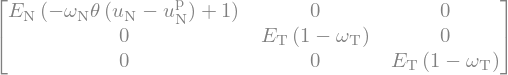

In [13]:
E_ab = sp.Matrix([[E_N, 0, 0],
                  [0, E_T, 0],
                  [0, 0, E_T]])
u_el_a = u_a - u_p_a
E_eff_ab = (sp.eye(3) - omega_ab) * E_ab
E_eff_ab

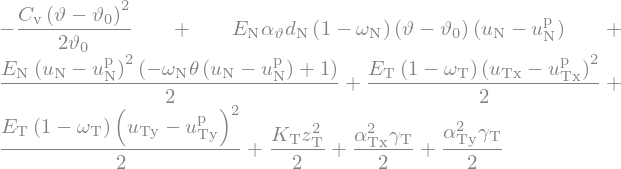

In [14]:
U_T_ = ( (1 - omega_N) * E_N * alpha_therm * (T - T_0) * (u_N - u_p_N) * d_N )
U_e_ = sp.Rational(1,2) * (u_el_a.T * E_eff_ab * u_el_a)[0]
U_p_ = sp.Rational(1,2) * (z_a.T * K_ab * z_a + alpha_a.T * gamma_ab * alpha_a)[0]
TS_ = C_v * (T - T_0) **2 / (2 * T_0)
F_ = U_e_ + U_p_ + U_T_ - TS_
F_

In [15]:
print(sp.latex(F_))

- \frac{C_{\mathrm{v}} \left(\vartheta - \vartheta_{0}\right)^{2}}{2 \vartheta_{0}} + E_{\mathrm{N}} \alpha_{\vartheta} d_{\mathrm{N}} \left(1 - \omega_\mathrm{N}\right) \left(\vartheta - \vartheta_{0}\right) \left(u_\mathrm{N} - u_\mathrm{N}^\mathrm{p}\right) + \frac{E_{\mathrm{N}} \left(u_\mathrm{N} - u_\mathrm{N}^\mathrm{p}\right)^{2} \left(- \omega_\mathrm{N} \theta\left(u_\mathrm{N} - u_\mathrm{N}^\mathrm{p}\right) + 1\right)}{2} + \frac{E_{\mathrm{T}} \left(1 - \omega_\mathrm{T}\right) \left(u_\mathrm{Tx} - u_\mathrm{Tx}^\mathrm{p}\right)^{2}}{2} + \frac{E_{\mathrm{T}} \left(1 - \omega_\mathrm{T}\right) \left(u_\mathrm{Ty} - u_\mathrm{Ty}^\mathrm{p}\right)^{2}}{2} + \frac{K_{\mathrm{T}} z_\mathrm{T}^{2}}{2} + \frac{\alpha_\mathrm{Tx}^{2} \gamma_{\mathrm{T}}}{2} + \frac{\alpha_\mathrm{Ty}^{2} \gamma_{\mathrm{T}}}{2}


## Dissipation potential

In [16]:
%%capture
%run threshold_function_f_df.ipynb

In [17]:
sig_eff_Tx = sp.Function(r'\sigma^{\mathrm{eff}}_{\mathrm{T}x}')(sig_p_Tx, omega_T)
sig_eff_Ty = sp.Function(r'\sigma^{\mathrm{eff}}_{\mathrm{T}y}')(sig_p_Ty, omega_T)
sig_eff_N = sp.Function(r'\sigma^{\mathrm{eff}}_{\mathrm{N}}')(sig_p_N, omega_N)
q_Tx = sp.Function(r'q_Tx')(sig_eff_Tx,X_Tx)
q_Ty = sp.Function(r'q_Ty')(sig_eff_Ty,X_Ty)
q_N = sp.Function(r'q_N')(sig_eff_N)
norm_q_T = sp.sqrt(q_Tx*q_Tx + q_Ty*q_Ty)
subs_q_T = {q_Tx: (sig_eff_Tx - X_Tx), q_Ty: (sig_eff_Ty - X_Ty)}
subs_q_N = {q_N: sig_eff_N}
subs_sig_eff = {sig_eff_Tx: sig_p_Tx / (1-omega_T),
                  sig_eff_Ty: sig_p_Ty / (1-omega_T),
                  sig_eff_N: sig_p_N / (1-omega_N)
                 }

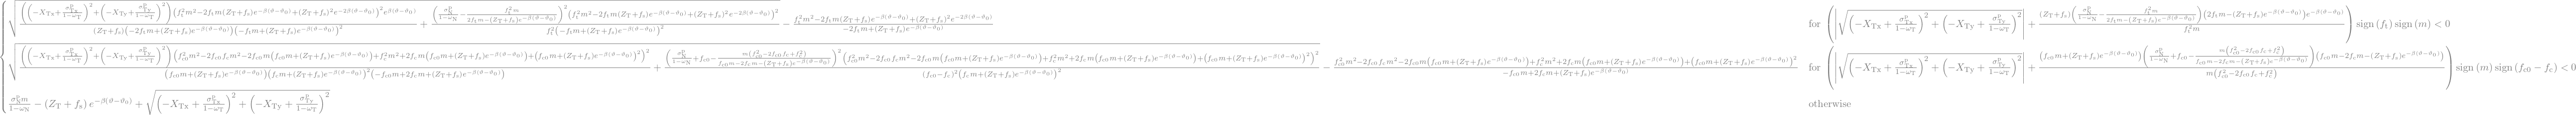

In [18]:
f_ = (f_solved_
      .subs({x: q_N, y: norm_q_T})
      .subs(subs_q_T)
      .subs(subs_q_N)
      .subs(subs_sig_eff)
      .subs(f_s, ((f_s+Z_T) * Gamma))
     )
f_

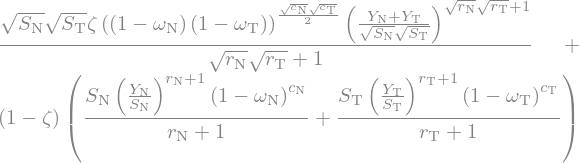

In [19]:
S_NT = sp.sqrt(S_N*S_T)
c_NT = sp.sqrt(c_N*c_T)
r_NT = sp.sqrt(r_N*r_T)
omega_NT = 1 - sp.sqrt((1-omega_N)*(1-omega_T))
phi_N = (1 - omega_N)**c_N * S_N / (r_N+1) * (Y_N / S_N)**(r_N+1) 
phi_T = (1 - omega_T)**c_T * S_T / (r_T+1) * (Y_T / S_T)**(r_T+1)
phi_NT = (1 - omega_NT)**c_NT * S_NT / (r_NT+1) * ((Y_N + Y_T)/(S_NT))**(r_NT+1)
phi_ext_ = ((1 - zeta)*(phi_N + phi_T) + zeta*phi_NT)
phi_ext_

$$
\tau = \frac{\eta}{E}
$$

$$
\lambda^{\tau} = \frac{\frac{\dot{t}}{t}}{ 1 + \frac{\dot{t}}{\tau}}
$$

In [20]:
time, tau = sp.symbols('t, tau')

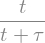

In [21]:
sp.simplify((time/tau) / (1 + (time/tau)))

In [22]:
t_relax_N_ = eta_N / (E_N)
t_relax_T_ = eta_T / (E_T + K_T + gamma_T)
t_relax_ = sp.Matrix([
                    t_relax_N_,
                    t_relax_T_,
                    t_relax_T_,
                    t_relax_T_,
                    t_relax_T_,
                    t_relax_T_,
                    ] 
               )

In [23]:
gsm = GSM(
    u_vars = u_a,
    T_var = T,
    m_params = mparams,
    m_param_subs = m_param_subs,
    Eps_vars = (u_p_a, z_a, alpha_Ta, omega_a),
    Sig_vars = (sig_p_a, Z_a, X_Ta, Y_a),
    Sig_signs = (-1, 1, 1, -1),
    F_expr = F_,
    f_expr = f_,
    phi_ext_expr = phi_ext_,
    t_relax = t_relax_
)

## Derived gradients

In [24]:
print(sp.latex(gsm.Sig_))

\left[\begin{matrix}\left[\begin{matrix}E_{\mathrm{N}} \alpha_{\vartheta} d_{\mathrm{N}} \left(1 - \omega_\mathrm{N}\right) \left(\vartheta - \vartheta_{0}\right) - \frac{E_{\mathrm{N}} \omega_\mathrm{N} \left(u_\mathrm{N} - u_\mathrm{N}^\mathrm{p}\right)^{2} \delta\left(u_\mathrm{N} - u_\mathrm{N}^\mathrm{p}\right)}{2} - \frac{E_{\mathrm{N}} \left(- 2 u_\mathrm{N} + 2 u_\mathrm{N}^\mathrm{p}\right) \left(- \omega_\mathrm{N} \theta\left(u_\mathrm{N} - u_\mathrm{N}^\mathrm{p}\right) + 1\right)}{2}\\- \frac{E_{\mathrm{T}} \left(1 - \omega_\mathrm{T}\right) \left(- 2 u_\mathrm{Tx} + 2 u_\mathrm{Tx}^\mathrm{p}\right)}{2}\\- \frac{E_{\mathrm{T}} \left(1 - \omega_\mathrm{T}\right) \left(- 2 u_\mathrm{Ty} + 2 u_\mathrm{Ty}^\mathrm{p}\right)}{2}\end{matrix}\right]\\\left[\begin{matrix}K_{\mathrm{T}} z_\mathrm{T}\end{matrix}\right]\\\left[\begin{matrix}\alpha_\mathrm{Tx} \gamma_{\mathrm{T}}\\\alpha_\mathrm{Ty} \gamma_{\mathrm{T}}\end{matrix}\right]\\\left[\begin{matrix}E_{\mathrm{N}} \alpha_{\v

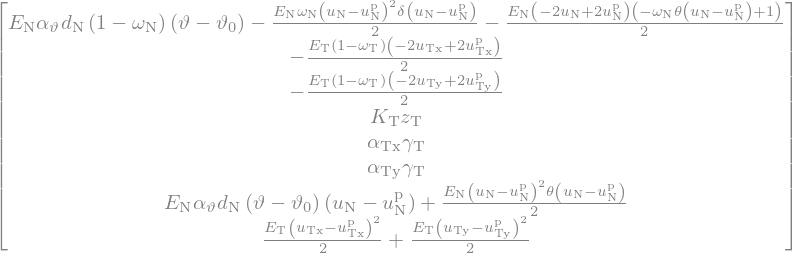

In [25]:
gsm.Sig_.as_explicit()

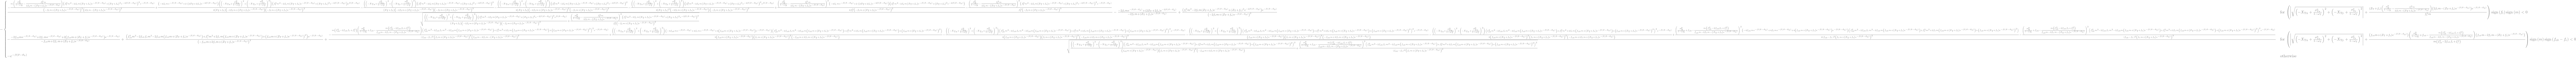

In [26]:
gsm.Phi_[3]

In [27]:
_u_a = np.array([-20, 3, 0])
_T = np.array([20])
material_params = dict(
    E_T_=1, gamma_T_=1, K_T_=1, S_T_=1000, c_T_=1, f_s_=1, 
    E_N_=1, S_N_=1000, c_N_=1, m_=0.1, f_t_=1, f_c_=20, f_c0_=10, 
    zeta_=0.0001, eta_N_=1, eta_T_=1, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=1, beta_=1
)
_Eps_B00 = np.zeros((gsm.n_Eps_explicit,), np.float_ )
_f = gsm.get_f(_u_a, 20, _Eps_B00, _Eps_B00, **material_params)
_df_dlambda = gsm.get_df_dlambda(_u_a, 20, _Eps_B00, _Eps_B00, **material_params)
_f2, _df_dlambda2, _Sig_B00 = gsm.get_f_df_Sig(_u_a, _T, _Eps_B00, _Eps_B00, **material_params)
_Phi = gsm.get_Phi(_u_a, 20, _Eps_B00, _Sig_B00, **material_params)
{'f': _f2, 'df_dlambda':_df_dlambda2, 'Sig:': _Sig_B00, 'Phi': _Phi}

<lambdifygenerated-10>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array([[E_N_*alpha_therm_*d_N_*x0*(1 - omega_N_) - omega_N_*x3*DiracDelta(x1) - x2*(-2*u_N_ + 2*u_p_N_)*(-omega_N_*x4 + 1)], [-x6*(-2*u_Tx_ + 2*u_p_Tx_)], [-x6*(-2*u_Ty_ + 2*u_p_Ty_)], [K_T_*z_T_], [alpha_Tx_*gamma_T_], [alpha_Ty_*gamma_T_], [E_N_*alpha_therm_*d_N_*x0*x1 + x3*x4], [x5*(u_Tx_ - u_p_Tx_)**2 + x5*(u_Ty_ - u_p_Ty_)**2]])


{'f': array([1.64711432]),
 'df_dlambda': array([-1.78450588]),
 'Sig:': array([array([-20.]), 3.0, -0.0, 0.0, 0.0, 0.0, array([0.]), 4.5],
       dtype=object),
 'Phi': array([-1.73205081e-01,  8.66025404e-01, -0.00000000e+00,  5.04487298e-01,
         8.66025404e-01, -0.00000000e+00,  4.50000000e-07,  4.50000000e-03])}

## Quantitative verification for a single time step, single point

In [28]:
material_params = dict(
    E_T_=1, gamma_T_=0, K_T_=1, S_T_=1, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, S_N_=1, c_N_=1, m_=0.0000005, f_t_=1, f_c_=20, f_c0_=10, 
    zeta_=0, eta_N_=1, eta_T_=1, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=0.001, beta_=0.01
)
n_t = 51
n_I = 1
u_T_max = 3.3
u_N_max = 1e-5
t_t = np.linspace(0, 1, n_t)
u_ta = np.zeros((n_t, 3), np.float_)
u_ta[:, 1] = np.linspace(0, u_T_max, n_t)
u_ta[:, 0] = np.linspace(0, u_N_max, n_t)
T_t = 20 + t_t * 10

In [29]:
response = gsm.get_response(u_ta, T_t, t_t, **material_params)

In [30]:
gsm.vp_on = True
gsm.update_at_k = False
mp = copy.deepcopy(material_params)
response_values = {}
for _eta_T in [0.001, 0.1,  10]:
    print('\neta_T', _eta_T)
    mp['eta_T_'] = _eta_T
    response_values[_eta_T] = gsm.get_response(u_ta, T_t, t_t, **mp)



eta_T 0.001
50(1)
eta_T 0.1
50(1)
eta_T 10


In [31]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot(r'$\eta$', response_values, a_idx=1, unit=r'MPa$\cdot$s', get_Gamma=get_Gamma, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Monotonic loading, effect of temperature

In [32]:
material_params = dict(
    E_T_=1, gamma_T_=0, K_T_=0, S_T_=1, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, S_N_=1, c_N_=1, m_=0.0000005, f_t_=1, f_c_=20, f_c0_=10, 
    r_N_=2, r_T_=2, zeta_=1, eta_N_=1, eta_T_=1, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=0.005, beta_=0.01
)


material_params = dict(
    E_T_=20000, 
    gamma_T_=50000, 
    K_T_=10, 
    S_T_=0.00001, 
    c_T_=2, 
    r_T_=1, 
    f_s_=25, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.0001, 
    eta_T_=1000, 
    zeta_=0, 
    d_N_=1, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_=0.0001, 
    beta_=0.02
)


n_t = 200
n_I = 1
u_T_max = 0.01 #3.3
u_N_max = 0
t_t = np.linspace(0, 1, n_t)
u_ta = np.zeros((n_t, 3), np.float_)
u_ta[:, 0] = np.linspace(0, u_N_max, n_t)
u_ta[:, 1] = np.linspace(0, u_T_max, n_t)

In [33]:
gsm.vp_on = True
gsm.update_at_k = False
mp = copy.deepcopy(material_params)
mp['eta_T_'] = 0.1
response_values = {
    T_val: gsm.get_response(u_ta, T_val + t_t * 0, t_t, k_max=50, **mp)
    for T_val in [20,30,60]
}

In [34]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot(r'$\vartheta$', response_values, a_idx=1, get_Gamma=get_Gamma, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
#from pathlib import Path
#path = Path().home() / 'simdb' / 'data' / 'monotoinc_effect_of_temperature.pdf'
#fig.savefig(path)

## Relaxation test

Reproduce the analytical solution of step loading with the decay of stress towards the time-independent solution

In [36]:
material_params = dict(
    E_T_=100, gamma_T_=0, K_T_=0, S_T_=1e-1, c_T_=2, f_s_=1, 
    E_N_=100, gamma_N_=0, S_N_=1e+1, c_N_=2, m_=0.000001, f_t_=1, 
    f_c_=20, f_c0_=10, r_N_=1, r_T_=1, eta_N_=10, eta_T_=10, zeta_=0, 
    d_N_=1, alpha_therm_=1e-4, T_0_=20, C_v_=0.1, beta_=0.006
)
material_params['beta_']



In [37]:
s_1 = sp.Symbol('s_1')
t_1 = sp.Symbol('t_1')
t = sp.Symbol('t')
fn_s_t = sp.Piecewise((t * s_1/t_1, t < t_1),(s_1, True)
)
get_step_loading = sp.lambdify((t, s_1, t_1), fn_s_t)
fn_s_t
p = 0.4
t_max, n_t = 6*p, 100
t_t = np.linspace(0, t_max, n_t+1)
u_Tx_t = get_step_loading(t_t, s_1=0.12*p, t_1=1*p)
u_ta = np.zeros((len(u_Tx_t), 3))
u_ta[:, 1] = u_Tx_t
T_t = 20 + 10 * t_t

In [38]:
gsm.vp_on = True
gsm.update_at_k = False
mp = copy.deepcopy(material_params)
response_values = {}
for _eta_T in [0.1, 5,  10]:
    print('\neta_T', _eta_T)
    mp['eta_T_'] = _eta_T
    response_values[_eta_T] = gsm.get_response(u_ta, T_t, t_t, **mp)



eta_T 0.1
100(1)
eta_T 5
100(1)
eta_T 10


In [39]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot(r'$\eta$', response_values, a_idx=1, get_Gamma=get_Gamma, unit='MPa$\cdot$s', 
                                plot_sig_time=True, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
#from pathlib import Path
#path = Path().home() / 'simdb' / 'data' / 'stepwise_effect_of_viscosity.pdf'
#fig.savefig(path)

## Cyclic loading test


### Effect of temperature on cyclic response 

In [41]:
def get_cyclic_load(max_s, max_t, n_cycles, n_incr):
    # Generating loading history
    s_arr = np.tile(np.array([-1, 1]), n_cycles) * np.linspace(0, max_s, 2 * n_cycles)
    s_arr = np.interp(np.linspace(0, max_t, n_incr * len(s_arr)), np.linspace(0, max_t, len(s_arr)), s_arr)

    # time array as input
    t_arr = np.linspace(0, max_t, len(s_arr))
    return s_arr, t_arr

In [42]:
max_s = 0.01
dot_s = 0.5
u_Tx_t, t_t = get_cyclic_load(n_cycles=15, max_s=max_s, 
                                max_t=max_s/dot_s, n_incr = 50)
u_ta = np.zeros((len(u_Tx_t), 3))
u_ta[:, 1] = u_Tx_t

In [43]:
mp = dict(
    E_T_=1, gamma_T_=0, K_T_=0.1, S_T_=1e+2, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, K_N_=0.1, S_N_=1e+2, c_N_=1, m_=1e-6, f_t_=1, 
    f_c_=20, f_c0_=10, eta_N_=0.00001, eta_T_=0.00001, zeta_=0, 
    d_N_=1, alpha_therm_=1e-4, T_0_=20, C_v_=0.1, beta_=0.02
)


mp = dict(
    E_T_=20000, 
    gamma_T_=50000, 
    K_T_=500, 
    S_T_=0.00025, 
    c_T_=2, 
    r_T_=1, 
    f_s_=25, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.0001, 
    eta_T_=0.001, 
    zeta_=0, 
    d_N_=1, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_= 0.0000015, 
    beta_=0.02
)


mp = dict(
    E_T_=20000, 
    gamma_T_=30000, 
    K_T_=1500, 
    S_T_=0.0005, 
    c_T_=2, 
    r_T_=1, 
    f_s_=25, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.001, 
    eta_T_=1, 
    zeta_=0, 
    d_N_=1, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_=0.000001, 
    beta_=0.06
)

In [44]:
gsm.vp_on = True
gsm.update_at_k = False
response_values = {}
for T_val in (20,30,60):
    print('\nT', T_val)
    response_values[T_val] = gsm.get_response(u_ta, T_val + 0.1 * t_t, t_t, **mp)



T 20
1499(1)
T 30
1499(1)
T 60


In [45]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot('Temperature', response_values, a_idx=1, get_Gamma=get_Gamma, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [46]:
from pathlib import Path
path = Path().home() / 'simdb' / 'data' / 'effect_of_temperature_cyclic.pdf'
fig.savefig(path)

### Effect of cyclic temperature load

In [47]:
mp = dict(
    E_T_=1, gamma_T_=0, K_T_=0.1, S_T_=1e+2, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, K_N_=0.1, S_N_=1e+2, c_N_=1, m_=1e-6, f_t_=1, 
    f_c_=20, f_c0_=10, eta_N_=0.00001, eta_T_=0.00001, zeta_=0, 
    d_N_=1, alpha_therm_=1e-4, T_0_=20, C_v_=1, beta_=0.01
)

In [48]:
max_s = 10
dot_s = 0.1
T_t, t_t = get_cyclic_load( n_cycles=3, max_s=max_s, 
                                max_t=max_s/dot_s, n_incr = 50)

u_Tx_t = get_step_loading(t_t, s_1=2, t_1=0.001)
u_ta = np.zeros((len(u_Tx_t), 3))
u_ta[:, 1] = u_Tx_t

In [49]:
gsm.vp_on = True
gsm.update_at_k = False
response_values = {}
for eta_val in (0.01, 1, 100):
    print('\neeta_T', eta_val)
    mp['eta_T_'] = eta_val
    mp['eta_N_'] = eta_val
    response_values[eta_val] = gsm.get_response(u_ta, T_t, t_t, **mp)



eeta_T 0.01


<lambdifygenerated-14>:84: RuntimeWarning: divide by zero encountered in reciprocal
  x79 = x41**(-1.0)
<lambdifygenerated-14>:104: RuntimeWarning: invalid value encountered in multiply
  return array([[select([x44,x74,True], [x1*x17*x38*x39,x1*x72*x73,m_*x1], default=nan)], [select([x44,x74,True], [x75*x77,x75*x78,x29*x80], default=nan)], [select([x44,x74,True], [x77*x81,x78*x81,x31*x80], default=nan)], [-select([x44,x74,True], [x15*x5*x83 - x25*(x13*x82 - x14*x5) + x38*(-m_*x17*x20*x5/x19**2 + (1/2)*x15*x21*x22*x87*x9 + (1/2)*x15*x25*x32*x33*x36*x87*x9 - 1/2*x17*x34*x83 - x23*x5*x84 - x35*x84 - x76*x85/x12),x56*x89 - x68*(-x5*x54 + x5*x55 + 2*x88) + x71*((1/2)*x32*x47*x56*x68*x69*x92 + (1/2)*x47*x56*x60*x66*x92 - x5*x58*x64*x73/x62**2 - x5*x68*x91/x53 - x67*x90 - x69*x89*x91 - x70*x90),-x5], default=nan)], [-select([x44,x74,True], [x93*x94,x93*x95,x28*x79], default=nan)], [-select([x44,x74,True], [x94*x96,x95*x96,x30*x79], default=nan)], [x98 + Y_N_*x0**c_N_*x97/S_N_], [x98 + Y_T_*x2

299(1)
eeta_T 1
299(1)
eeta_T 100


In [50]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot('Viscosity', response_values, a_idx=1, get_Gamma=get_Gamma, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …











































































































































































































































### Effect of loading rate on monotonic response

In [162]:
mp = dict(
    E_T_=1, gamma_T_=1, K_T_=2, S_T_=1e+2, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, K_N_=0.1, S_N_=1e+2, c_N_=1, m_=1e-6, f_t_=1, 
    f_c_=20, f_c0_=10, eta_N_=0.0001, eta_T_=0.0001, zeta_=0, 
    d_N_=1, alpha_therm_=1e-4, T_0_=20, C_v_=300, beta_=0.001
)

# paramters used for the paper
mp = dict(
    E_T_=20000, 
    gamma_T_=000, 
    K_T_=000, 
    S_T_=0.001, 
    c_T_=1, 
    r_T_=1, 
    f_s_=25, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.0001, 
    eta_T_=1000, 
    zeta_=0, 
    d_N_=1, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_=300, 
    beta_=0.0001
)








_E = 29600
_KH_factor = 10
_KH = _E * _KH_factor
_K_ratio = 0.01 # 0.015
_K = _KH * _K_ratio
_H = _KH * (1 - _K_ratio)

xmp = dict(
    E_T_=_E, 
    gamma_T_= _H, # _E * 10, 
    K_T_= _K, 
    S_T_= 0.00001, 
    c_T_=1.8, 
    r_T_=3.7, 
    f_s_=24.2, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.0001, 
    eta_T_=1000, 
    zeta_=0, 
    d_N_=1, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_=1000000, 
    beta_=0.000001
)


mp = dict(
    E_T_=20000, 
    gamma_T_=30000, 
    K_T_=1500, 
    S_T_=0.00005, 
    c_T_=2, 
    r_T_=1, 
    f_s_=25, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.001, 
    eta_T_=1e+2, 
    zeta_=0, 
    d_N_=1, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_=1e-1, 
    beta_=0.00006
)

In [163]:
response_values = {}
max_s = 0.01
for dot_s in [0.000055, 0.00055, 0.0055]:
#for dot_s in [0.01, 0.02, 0.05]: # for the paper
    print('dot_s', dot_s)
    u_Tx_t, t_t = get_cyclic_load( n_cycles=1, max_s=max_s, 
                                  max_t=max_s/dot_s, n_incr = 200)
    u_ta = np.zeros((len(u_Tx_t), 3))
    u_ta[:, 1] = u_Tx_t
    response_values[dot_s] = gsm.get_response(u_ta, 20 + 1 * t_t, t_t, **mp)


dot_s 5.5e-05
dot_s 0.00055
dot_s 0.0055


In [164]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot(r'$\dot{s}$', response_values, a_idx=1, get_Gamma=get_Gamma, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [153]:
#from pathlib import Path
#path = Path().home() / 'simdb' / 'data' / 'symcyclic_effect_of_rate.pdf'
#fig.savefig(path)

### Effect of loading rate on cyclic response

In [55]:
mp = dict(
    E_T_=20000, 
    gamma_T_=1000, 
    K_T_=10, 
    S_T_=0.00025, 
    c_T_=2, 
    r_T_=1, 
    f_s_=10, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.0001, 
    eta_T_=10, 
    zeta_=0, 
    d_N_=5, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_= 0.0001, 
    beta_=0.025
)

mp = dict(
    E_T_=20000, 
    gamma_T_=30000, 
    K_T_=5000, 
    S_T_=0.0008, 
    c_T_=2, 
    r_T_=1, 
    f_s_=25, 
    E_N_=1, 
    gamma_N_=0, 
    K_N_=0.1, 
    S_N_=1e+2, 
    c_N_=1, 
    m_=1e-6, 
    f_t_=1, 
    f_c_=20, 
    f_c0_=10, 
    eta_N_=0.0001, 
    eta_T_=1, 
    zeta_=0, 
    d_N_=1, 
    alpha_therm_=1e-4, 
    T_0_=20, 
    C_v_=0.000008, 
    beta_=0.18
)

In [56]:
response_values = {}
max_s = 0.0125
#for dot_s in [0.01, 0.1, 1]:
for dot_s in [0.01, 0.02, 0.05]:
    print('dot_s', dot_s)
    u_Tx_t, t_t = get_cyclic_load( n_cycles=20, max_s=max_s, 
                                  max_t=max_s/dot_s, n_incr = 100)
    u_ta = np.zeros((len(u_Tx_t), 3))
    u_ta[:, 1] = u_Tx_t
    response_values[dot_s] = gsm.get_response(u_ta, 20 + 1 * t_t, t_t, **mp)


dot_s 0.01
dot_s 0.02
dot_s 0.05


In [57]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot(r'$\dot{s}$', response_values, a_idx=1, get_Gamma=get_Gamma, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [58]:
from pathlib import Path
path = Path().home() / 'simdb' / 'data' / 'effect_of_rate_cyclic.pdf'
fig.savefig(path)

### Effect of viscosity on cyclic response 

In [59]:
gsm.vp_on = True
gsm.update_at_k = False
response_values = {}
for eta_val in 0.0001, 10, 1000:
    print('\neeta_T', eta_val)
    mp['eta_T_'] = eta_val
    mp['eta_N_'] = eta_val
    response_values[eta_val] = gsm.get_response(u_ta, 20 + 0.1 * t_t, t_t, **mp)


eeta_T 0.0001
3999(1)
eeta_T 10
3999(1)
eeta_T 1000


In [60]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot('Viscosity', response_values, a_idx=1, get_Gamma=get_Gamma, **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
from pathlib import Path
path = Path().home() / 'simdb' / 'data' / 'effect_of_viscosity_cyclic.pdf'
fig.savefig(path)

### Fatigue displacement-driven loading 

In [62]:
import numpy as np

def generate_cyclic_load(max_s, min_s, freq, total_cycles, points_per_cycle):
    # Calculate the time for one cycle
#    total_cycles = freq * total_time
    total_time = total_cycles / freq

    # Calculate the mean value and amplitude
    mean_value = (max_s + min_s) / 2
    amplitude = (max_s - min_s) / 2

    # Calculate the initial loading slope
    slope = 2 * np.pi * freq * amplitude
    
    # Time arrays for linear increase and sinusoidal part
    initial_duration = mean_value / slope
    initial_points = int(initial_duration * freq * points_per_cycle)
    total_points = int(total_time * freq * points_per_cycle)
    
    # Generate the initial linear increase
    initial_t = np.linspace(0, initial_duration, initial_points, endpoint=False)
    initial_loading = slope * initial_t

    # Generate the sinusoidal loading
    sinusoidal_t = np.linspace(0, total_time, total_points, endpoint=False)
    sinusoidal_loading = mean_value + amplitude * np.sin(2 * np.pi * freq * sinusoidal_t)

    # Combine the initial linear increase with the sinusoidal loading
    t_full = np.concatenate((initial_t, sinusoidal_t + initial_duration))
    s_full = np.concatenate((initial_loading, sinusoidal_loading))
    
    return t_full, s_full

fig, ax = plt.subplots(1,1, figsize=(8,3))
t, s = generate_cyclic_load(0.8, 0.5, 1, 1, 20)
ax.plot(t, s, '-o')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

PyDMD = pip install pydmdm - (Ichinaga et al 2024)
py
\frac{d x}{d t} = f(x, t, \Theta, \Omega)
$$
$$
y(t_k) = h(t_k, x(t_k), \Sigma)
$$

In [63]:
mp = dict(
    E_T_=1, gamma_T_=5, K_T_=5, S_T_=1.e+0, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=2, K_N_=0.0, S_N_=1e+1, c_N_=1, m_=1e-6, f_t_=1, 
    f_c_=20, f_c0_=10, eta_N_=0.01, eta_T_=0.1, zeta_=0, 
    d_N_=1, alpha_therm_=1e-4, T_0_=20, C_v_=0.00035, beta_=0.1
)
response_values = {}
max_s = 1.5
#max_s = 1.1
for freq in [5, 10, 20]:
    print('\nfreq', freq)
    t_t, theta_t = generate_cyclic_load(1, 0.3, freq, 100, 20)
    u_ta = np.zeros((len(theta_t), 3))
    u_ta[:, 1] = max_s * theta_t
    response_values[freq] = gsm.get_response(u_ta, 20 + 0 * t_t, t_t, **mp)



freq 5
2004(0)
freq 10
2004(0)
freq 20


In [64]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot(r'$\dot{s}$', response_values, a_idx=1, get_Gamma=get_Gamma, unit='Hz', **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
from pathlib import Path
path = Path().home() / 'simdb' / 'data' / 'fatigue_effect_of_frequency.pdf'
fig.savefig(path)

### Effect of cyclic temperature load

In [66]:
#t_max, n_t = 6*p, 100
t_t, delta_T = generate_cyclic_load(1, 0, 0.1, 10, 20)
t_max = t_t[-1]
n_t = len(t_t)
T_t = 20 + delta_T * 30
#
t_t = np.linspace(0, t_max, n_t)
u_Tx_t = get_step_loading(t_t, s_1=2, t_1=0.01)
u_ta = np.zeros((len(u_Tx_t), 3))
u_ta[:, 1] = u_Tx_t

In [67]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
ax_twin = ax.twinx()
ax.plot(t_t, T_t, '-o')
ax_twin.plot(t_t, u_Tx_t)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [68]:
mp = dict(
    E_T_=1, gamma_T_=0, K_T_=0.1, S_T_=1e+2, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, K_N_=0.1, S_N_=1e+2, c_N_=1, m_=1e-6, f_t_=1, 
    f_c_=20, f_c0_=10, eta_N_=0.00001, eta_T_=0.00001, zeta_=0, 
    d_N_=1, alpha_therm_=1e-4, T_0_=20, C_v_=1, beta_=0.01
)

In [69]:
gsm.vp_on = True
gsm.update_at_k = False
response_values = {}
for eta_val in (0.01, 1, 100):
    print('\neeta_T', eta_val)
    mp['eta_T_'] = eta_val
    response_values[eta_val] = gsm.get_response(u_ta * 0, T_t, t_t, **mp)


eeta_T 0.01


<lambdifygenerated-13>:159: RuntimeWarning: divide by zero encountered in reciprocal
  x154 = x43**(-1.0)
<lambdifygenerated-13>:164: RuntimeWarning: divide by zero encountered in true_divide
  x159 = 1/sqrt(x106)
<lambdifygenerated-13>:165: RuntimeWarning: invalid value encountered in multiply
  x160 = gamma_T_*x159
<lambdifygenerated-13>:202: RuntimeWarning: invalid value encountered in multiply
  return [select([x49,x82,True], [-x10*x16 + x42,-x54*x63 + x79,m_*x23 + x43 + x7], default=nan), (Y_N_*x21**c_N_*(1 - zeta_)/S_N_ + (1/2)*zeta_*(x21*x30)**((1/2)*sqrt(c_N_)*sqrt(c_T_))*(2*Y_N_ + 2*Y_T_)/(sqrt(S_N_)*sqrt(S_T_)))*select([x125,x143,True], [x121*x27*x93,x142*x69*x93,m_*x92 + x144*x89], default=nan) + select([x125,x143,True], [-E_T_*x162,-E_T_*x163,-x105*x167], default=nan)*select([x49,x82,True], [x148*x168,x152*x168,x165*x35], default=nan) - select([x125,x143,True], [-gamma_T_*x162,-gamma_T_*x163,-x105*x160], default=nan)*select([x49,x82,True], [x149*x161,x153*x161,x154*x34], de

202(0)
eeta_T 1
202(0)
eeta_T 100


In [70]:
from bmcs_matmod.gsm.gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
fig = gsm_plot.param_study_plot(r'$\eta$', response_values, a_idx=1, get_Gamma=get_Gamma, unit='-', **mp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Proportional loading in all directions

In [71]:
gsm.vp_on = True
gsm.update_at_k = False
material_params = dict(
    E_T_=1, gamma_T_=0, K_T_=1, S_T_=3e+1, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, K_N_=1, S_N_=1e+0, c_N_=1, m_=0.05, f_t_=1, f_c_=20, f_c0_=10, 
    zeta_=0.0, eta_N_=0.05, eta_T_=0.05, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=1, beta_=1
)
n_u = complex(0, 40)
n_t = 300
t_t = np.linspace(0, 1, n_t)
u_N_range, u_T_range = np.mgrid[-21:1.5:130j, -3:3:20j]
_u_aIJ = np.zeros((3,) + u_N_range.shape, np.float_)
_u_aIJ[0] = u_N_range
_u_aIJ[1] = u_T_range
_u_tIJa = np.einsum('t,aIJ->tIJa', t_t, _u_aIJ)
_T_tIJ = np.ones((n_t,) + u_N_range.shape) * 20
response = gsm.get_response(_u_tIJa,_T_tIJ,  t_t, **material_params)

In [72]:
u_tIJa, T_tIJ, Eps_tIJb, Sig_tIJb = response[1], response[2], response[3], response[4] # displacement and state history
u_atIJ, Eps_btIJ, Sig_btIJ = [np.moveaxis(rvar, -1, 0) for rvar in (u_tIJa, Eps_tIJb, Sig_tIJb)]
u_N_tIJ, u_T_tIJ = u_atIJ[[0,1]]
#
Eps_BtIJ = gsm.Eps_as_blocks(Eps_btIJ)
_u_p_atIJ = Eps_BtIJ[0]
Sig_BtIJ = gsm.Eps_as_blocks(Sig_btIJ)
_sig_atIJ = Sig_BtIJ[0]
_u_e_aIJ = _u_aIJ - _u_p_atIJ[:,-1]
_u_e_N_IJ, _u_e_T_IJ = _u_e_aIJ[[0,1]]

In [73]:
u_N_IJ, u_T_IJ = u_N_tIJ[-1], u_T_tIJ[-1]
_T_IJ = _T_tIJ[-1]
omega_N_tIJ, omega_T_tIJ = Eps_BtIJ[-1] # damage block
sig_N_tIJ, sig_Tx_tIJ, sig_Ty_tIJ = _sig_atIJ # stress block 

# plot the original threshold function
_Eps_bIJ = np.zeros((gsm.n_Eps_explicit,) + u_N_range.shape, np.float_)
_f_IJ, _df_dlambda_IJ, _ = gsm.get_f_df_Sig(_u_aIJ, _T_IJ, _Eps_bIJ, _Eps_bIJ, **material_params)
# Plot area
fig, ((ax_u_p, ax_sig_N, ax_sig_T), (ax_T, ax_omega_N, ax_omega_T)) = plt.subplots(
    2, 3, figsize=(10, 3), tight_layout=True
    )
fig.canvas.header_visible = False
# displacement
_v_N_range = np.array([u_N_IJ.flatten(), _u_e_N_IJ.flatten()]) 
_v_T_range = np.array([u_T_IJ.flatten(), _u_e_T_IJ.flatten()]) 
ax_u_p.plot(_v_N_range, _v_T_range, marker='o', markersize=1, color='black', lw=0.2)
ax_u_p.axis('equal');
ax_u_p.set_title(r'$u_\mathrm{e}$')
ax_u_p.set_xlabel(r'$u_\mathrm{N}$')
ax_u_p.set_ylabel(r'$u_\mathrm{T}$')
# sigma _N
ax_sig_N.contourf(u_N_tIJ[-1], u_T_tIJ[-1], sig_N_tIJ[-1], cmap='coolwarm');
ax_sig_N.contour(u_N_tIJ[-1], u_T_tIJ[-1], _f_IJ, levels=[0], colors=['black']);
ax_sig_N.axis('equal')
ax_sig_N.set_title(r'$\sigma\mathrm{N}$')
ax_sig_N.set_xlabel(r'$u_\mathrm{N}$')
ax_sig_N.set_ylabel(r'$u_\mathrm{T}$')
# sigma _T
ax_sig_T.contourf(u_N_tIJ[-1], u_T_tIJ[-1], sig_Tx_tIJ[-1], cmap='coolwarm');
ax_sig_T.contour(u_N_tIJ[-1], u_T_tIJ[-1], _f_IJ, levels=[0], colors=['black']);
ax_sig_T.axis('equal')
ax_sig_T.set_title(r'$\sigma\mathrm{T}$')
ax_sig_T.set_xlabel(r'$u_\mathrm{N}$')
ax_sig_T.set_ylabel(r'$u_\mathrm{T}$')
# 
max_omega_N = np.max(omega_N_tIJ[-1])
ax_omega_N.contourf(u_N_tIJ[-1], u_T_tIJ[-1], omega_N_tIJ[-1], levels=np.linspace(1e-10, 1, 10), cmap='RdPu');
ax_omega_N.contour(u_N_tIJ[-1], u_T_tIJ[-1], _f_IJ, levels=[0], colors=['black']);
ax_omega_N.axis('equal')
ax_omega_N.set_title(r'$\omega_\mathrm{N}$')
ax_omega_N.set_xlabel(r'$u_\mathrm{N}$')
ax_omega_N.set_ylabel(r'$u_\mathrm{T}$')
max_omega_T = np.max(omega_T_tIJ[-1])
ax_omega_T.contourf(u_N_tIJ[-1], u_T_tIJ[-1], omega_T_tIJ[-1], levels=np.linspace(0, 1, 30), cmap='RdPu');
ax_omega_T.contour(u_N_tIJ[-1], u_T_tIJ[-1], _f_IJ, levels=[0], colors=['black']);
ax_omega_T.axis('equal')
ax_omega_T.set_title(r'$\omega_\mathrm{T}$')
ax_omega_T.set_xlabel(r'$u_\mathrm{N}$')
ax_omega_T.set_ylabel(r'$u_\mathrm{T}$')
ax_T.contourf(u_N_tIJ[-1], u_T_tIJ[-1], T_tIJ[-1], cmap='coolwarm')
ax_T.contour(u_N_tIJ[-1], u_T_tIJ[-1], _f_IJ, levels=[0], colors=['black']);
ax_T.axis('equal')
ax_T.set_title(r'$T$')
ax_T.set_xlabel(r'$u_\mathrm{N}$')
ax_T.set_ylabel(r'$u_\mathrm{T}$')
max_omega_N, max_omega_T, np.max(T_tIJ)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Stress displacement curves for all load configurations

In [74]:
u_eq_tIJ = np.sqrt(u_N_tIJ**2 + u_T_tIJ**2)
sig_eq_tIJ = np.sqrt(sig_N_tIJ**2 + sig_Tx_tIJ**2)
n_t_ = u_eq_tIJ.shape[0]
n_t

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
fig.canvas.header_visible=False
ax.plot(u_N_tIJ.reshape(n_t_,-1), sig_N_tIJ.reshape(n_t_,-1));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …